~150 lines of Python

~1500 lines of Markdown (explanations, words, etc.)

Mark who did what: Me (2,4,6), Jake (1,3,5,7)

SUBMIT INDIVUDALLY

What we are being graded on?

Motivation/Relevance: Does the tutorial make the reader believe the topic is important (a) in general and (b) with respect to data analysis/data science?

• Ease of Understanding: is it easy to process the topic?

• Prose: Does the prose in the Markdown portion of the .ipynb add to the reader’s understanding of the tutorial and does it connect well with the code that it describes?

• Code: Does the code help solidify understanding, is it well documented, and does it include helpful examples?

• Presentation: Attractiveness and Ease of Processing on the Web

• Persuasiveness: Level to which topic is presented as relevant, originality of the questions asked, and how the data is used to craft a story to address the questions

• Useful resources: other resources that would help the reader understand basic concepts, deep dive, related work, etc?

In order to do our data analysis, we first need to import some vital packages that help with operations, formatting, and plotting. This is what we do here:

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now we are loading our Dataset into our environment using the Pandas package, and naming the dataframe Coffee:

In [8]:
Coffee = pd.read_csv('arabica_coffee_data.csv')

Background about Dataset:

This dataset contains the milling, company, and product info for over 1000 kinds of Arabica-style coffee grown all over the world. Each coffee is also graded based on key attributes, incluing aroma, flavor, aftertaste, acidity, etc. and is given an overall score out of 100. This allows us to draw many insights that can be very interesting. For example, are the flavor attributes correlated to a coffee's score? What attribute was most important in the grading of each coffee? These insights can be used for a multitude of other projects and real-world implications. For example, coffee companies could use these insights to further research into coffee's that were scored very high. Also, the insights could break ground on which regions, altitudes, and settings coffee grows most flavorful, aromatic, etc.

Our Framing Questions for EDA:

1. Does the country the coffee was grown affect it's aroma score?

2. What about it's flavor score?

3. Does the altitude the coffee was grown at have an impact on its flavor or other attributes?

4. Which country grows the most coffee?

5. Which coffee attribute is most important in a coffee's grading?

6. Which species of coffee has the best flavor? Graded the lowest?

7. What do all these visualizations tell us about the enjoyability of the coffee?


....

Exploratory Data Analysis

What columns are available for us to consider in our data analysis?

In [9]:
Coffee.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

How clean is the data? Does anything need to be done? How is it arranged?

In [10]:
Coffee.head(10)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,6,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,7,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,9,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,10,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


Looking specifically at the Aroma, Flavor, Country, and Altitude of cases in the dataset

In [11]:
Coffee.head(10)[['Aroma','Flavor','Country.of.Origin','altitude_mean_meters']]

,Aroma,Flavor,Country.of.Origin,altitude_mean_meters
0,8.67,8.83,Ethiopia,2075.0
1,8.75,8.67,Ethiopia,2075.0
2,8.42,8.50,Guatemala,1700.0
3,8.17,8.58,Ethiopia,2000.0
4,8.25,8.50,Ethiopia,2075.0
5,8.58,8.42,Brazil,NaN
6,8.42,8.50,Peru,NaN
7,8.25,8.33,Ethiopia,1635.0
8,8.67,8.67,Ethiopia,1635.0
9,8.08,8.58,Ethiopia,1822.5


**ANALYSIS OF QUESTIONS:**

1. Does the country the coffee was grown affect it's aroma score? - Jake Adams
- First, we need to see what type of variable Aroma is. Lets do some prelimiary EDA before visualizing Aroma scores by country. Specifically, I am going to look at the average value, some filtering, some summary statistics, and the highest Aroma scores to better understand how much they differ.

In [12]:
#Lets do some prelim EDA with pandas before visualzing
Aroma_Countries = Coffee[["Country.of.Origin","Aroma"]]
aroma_df = pd.DataFrame(Aroma_Countries)

aroma_df.sort_values(by='Aroma', ascending=False)
print(aroma_df["Aroma"])

0       8.67
1       8.75
2       8.42
3       8.17
4       8.25
        ... 
1306    7.08
1307    6.75
1308    7.25
1309    7.50
1310    0.00
Name: Aroma, Length: 1311, dtype: float64


Average aroma scores 

In [13]:
average_aroma_score = Coffee['Aroma'].mean()
print(f'Average Aroma Score: {average_aroma_score}')

high_aroma_coffee = aroma_df[aroma_df['Aroma'] > average_aroma_score]

print(aroma_df.head(10)[["Aroma"]])

Average Aroma Score: 7.563806254767353
   Aroma
0   8.67
1   8.75
2   8.42
3   8.17
4   8.25
5   8.58
6   8.42
7   8.25
8   8.67
9   8.08


Summary Statistics

In [14]:
aroma_score_stats = Coffee['Aroma'].describe()

print(aroma_score_stats)

count    1311.000000
mean        7.563806
std         0.378666
min         0.000000
25%         7.420000
50%         7.580000
75%         7.750000
max         8.750000
Name: Aroma, dtype: float64


   VISUALIZATION QUESTION 1
    -   Here we are taking our first look at a potential predictory varaibles for the enjoyment elements of a Coffee such Aroma, Taste, Aftertaste, Sweetness, etc. This graph takes a specific look at Aroma. When trying to determine how coffee enjoyability corelates with other factors, we can visualize Aroma score already present in the data set dependent on country to try and look for correlations. An Aroma score is a one of the elements that goes into a good coffee score. Thus, categorizing Aroma scores by country will gus a good insight into the coffee's enjoyability and what countries are doing right. If we notice a trend in coffee aroma scores based on country, it could help us see what other factors countries are using to increase coffee enjoyabily. In the visualization below, we see there is little to no difference between aroma, but there is one outlier. Thus, we can assume there is little impact on coffee's enjoyablity per country when considering the Aroma score. 

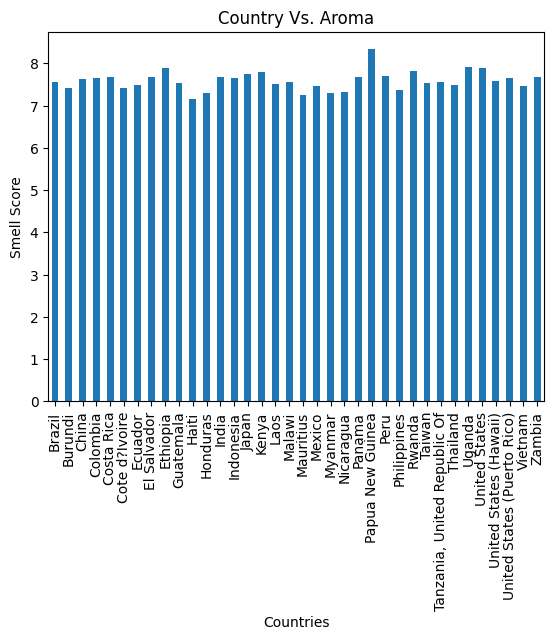

In [15]:
df = pd.DataFrame(Aroma_Countries)


grouped_df = df.groupby('Country.of.Origin')['Aroma'].mean()

grouped_df.plot(x = "Country.of.Origin", y = "Aroma",kind = 'bar',title = "Country Vs. Aroma")
plt.xlabel("Countries")
plt.ylabel("Smell Score")
plt.show()

2. Does the country the coffee was grown in affect it's flavor score? - Jack Engleman

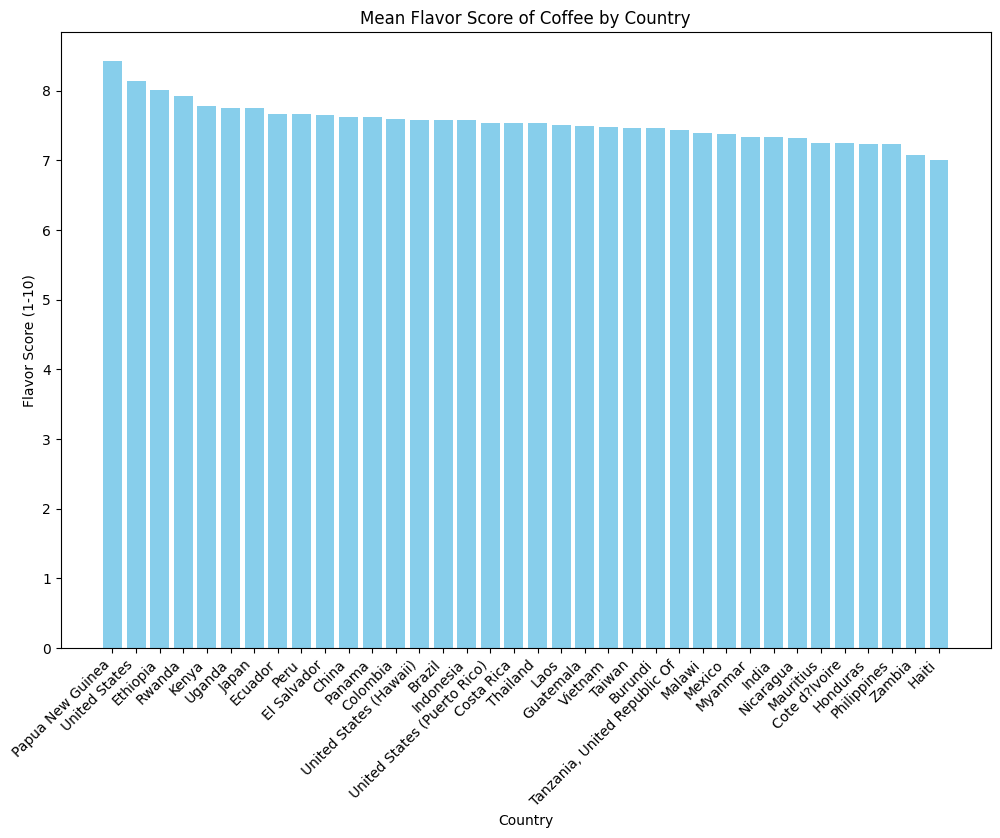

In [16]:
FlavorbyCountry = Coffee[['Country.of.Origin','Flavor']]

Df = pd.DataFrame(FlavorbyCountry)

Grouped_df = Df.groupby('Country.of.Origin')['Flavor'].mean().reset_index()
Grouped_df = Grouped_df.sort_values(by='Flavor', ascending=False)


plt.figure(figsize=(12, 8))
plt.bar(Grouped_df['Country.of.Origin'], Grouped_df['Flavor'], color='skyblue')

#Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Country')
plt.ylabel('Flavor Score (1-10)')
plt.title('Mean Flavor Score of Coffee by Country')
plt.show()

**Analysis - Jack Engleman**

This plot shows each country and the average flavor score for the coffee's that are produced there. Not surprisingly, there is not a lot of difference between the best performing country (Papua New Guinea) and the worst performing country (Haiti). However, there is a significant difference in flavor score for the highest scoring Country (Papua New Guinea) compared to the second highest (United States). It can also be seen that only 3 coffee producing countries can boast an average flavor score of above 8.0/10, which are Papua New Guinea, United States, and Ethiopia.

I was surprised by how high the United States was on this scale, I did not realize the US made such good-tasting coffee. I was also surpised to see Papua New Guinea perform the best, I don't associate Papua New Guinea with making coffee in general, let alone the best tasting coffee.

I think this plot can be used for many different things. For example, a new coffee company could use this to figure out where they want to source their beans from.

3. Does the altitude the coffee was grown at have an impact on its flavor or other attributes? - Jake Adams
   - Altitude is an interesting potential predictor for enjoyability attributes that we will be examing. Lets do some summary statistics and preliminary EDA before visualizing altitude VS. flavor and other enjoyability elements. Notice, there is a vast difference in the standard deviation of altitude. Right away this tells me that altitude may not predict enjoyability elements well because coffee is grown at such drastically different altitudes. 

In [17]:
#Average altitude coffee is grown at
altitude = Coffee['altitude_mean_meters'].describe()

print(altitude)

count      1084.000000
mean       1784.196379
std        8767.016913
min           1.000000
25%        1100.000000
50%        1310.640000
75%        1600.000000
max      190164.000000
Name: altitude_mean_meters, dtype: float64


QUESTION 3: VISUALIZATION 
   - Altitude was a predictor of flavor that my teammate and I assumed at the beginning of our project would affect enjoyablity. We assumed the altitude people grew their coffee beans in would directly contribute to the amount of nutrients, sunlight, etc. it could get, thus leading to a worse or better coffee flavor score. However, this was completely incorrect. After examining scatter plots of flavor score and aftertaste scores based on their average altitude in meters in which they were grown, there was no significant difference found between them. For example, take the Flavor Vs. Altitude scatter plot. This plot is filtered for outliers, so there are no significant outliers that could affect our correlation. We can see there are drastically different flavor scores per case at each altitude. The same observations can be seen in the aftertaste VS. altitude scatter plot. On top of this, when we took the average of the flavor scores and aftertaste scores in order to wrangle the most efficient enjoyablity aspect, we found there was still no significant correlation between the two. To add to this, there was a diverse range of flavor scores for each average attitude. Thus, the altitude is not a significant predictor of coffee scores, and we can assume other factors determine enjoyability. 

C:\Users\adams\AppData\Local\Temp\ipykernel_23784\2423140459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flavor_Altitude["altitude_mean_meters"] = pd.to_numeric(Flavor_Altitude["altitude_mean_meters"], errors="coerce")
C:\Users\adams\AppData\Local\Temp\ipykernel_23784\2423140459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  After_Taste_Altitude["altitude_mean_meters"] = pd.to_numeric(After_Taste_Altitude["altitude_mean_meters"], errors="coerce")
C:\Users\adams\AppData\Local\Temp\ipykernel_2378

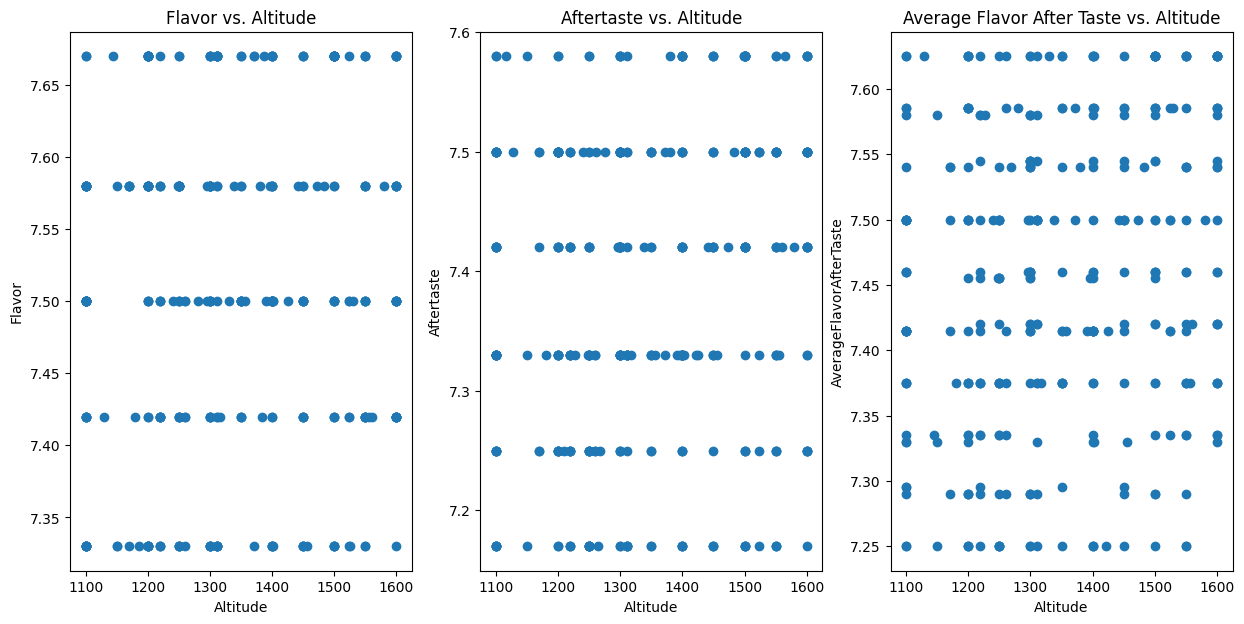

In [18]:
#initialize data froames
Flavor_Altitude = Coffee[["altitude_mean_meters", "Flavor"]]
Flavor_Altitude["altitude_mean_meters"] = pd.to_numeric(Flavor_Altitude["altitude_mean_meters"], errors="coerce")

After_Taste_Altitude = Coffee[["altitude_mean_meters", "Aftertaste"]]
After_Taste_Altitude["altitude_mean_meters"] = pd.to_numeric(After_Taste_Altitude["altitude_mean_meters"], errors="coerce")

#omitting outliers
def outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    return df[(df[col] >= q1) & (df[col] <= q3)]
#filtering for outlier in after taste vs. altitude and flavor vs. altitude data sets
After_Taste_Altitude = outliers(After_Taste_Altitude, "altitude_mean_meters")
Flavor_Altitude = outliers(Flavor_Altitude, "altitude_mean_meters")

After_Taste_Altitude = outliers(After_Taste_Altitude, "Aftertaste")
Flavor_Altitude = outliers(Flavor_Altitude, "Flavor")


#what if we take the average of both aftertaste and flavor scores to get a more accurate depiction of flavor
df3 = Coffee[['Flavor', 'Aftertaste','altitude_mean_meters']]
df3['AverageFlavorAfterTaste'] = df3[['Flavor', 'Aftertaste']].mean(axis=1)
df3["altitude_mean_meters"] = pd.to_numeric(df3["altitude_mean_meters"], errors="coerce")

#filter these outliers
df3 = outliers(df3,"altitude_mean_meters")
df3 = outliers(df3, "AverageFlavorAfterTaste")

#set layout for three visuals
fig, facets = plt.subplots(1, 3, figsize=(15, 7))

#display
facets[0].scatter(Flavor_Altitude["altitude_mean_meters"], Flavor_Altitude["Flavor"])
facets[0].set_xlabel("Altitude")
facets[0].set_ylabel("Flavor")
facets[0].set_title("Flavor vs. Altitude")


facets[1].scatter(After_Taste_Altitude["altitude_mean_meters"], After_Taste_Altitude["Aftertaste"])
facets[1].set_xlabel("Altitude")
facets[1].set_ylabel("Aftertaste")
facets[1].set_title("Aftertaste vs. Altitude")

facets[2].scatter(df3["altitude_mean_meters"], df3["AverageFlavorAfterTaste"])
facets[2].set_xlabel("Altitude")
facets[2].set_ylabel("AverageFlavorAfterTaste")
facets[2].set_title("Average Flavor After Taste vs. Altitude")

plt.show()



4. Which country grows the most coffee? - Jack Engleman

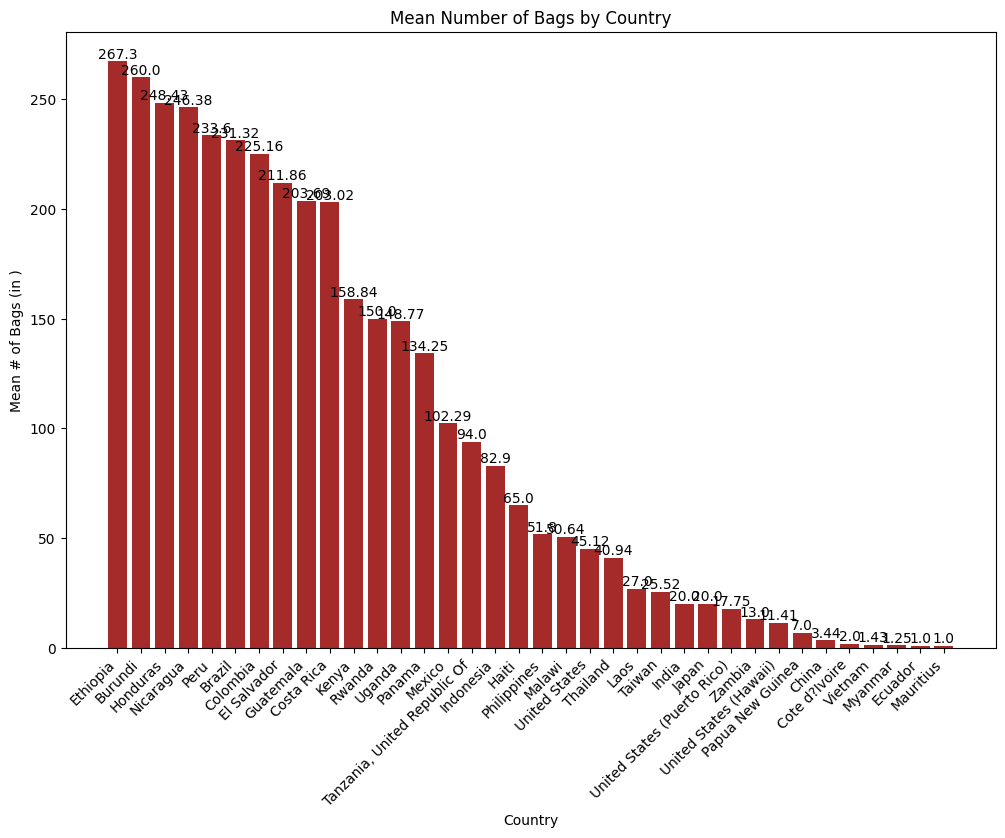

In [19]:
MostCoffee = Coffee[['Country.of.Origin', 'Number.of.Bags']]
MostCoffeeGrouped = MostCoffee.groupby('Country.of.Origin')['Number.of.Bags'].mean().reset_index()

MostCoffeeGrouped = MostCoffeeGrouped.sort_values(by='Number.of.Bags', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(MostCoffeeGrouped['Country.of.Origin'], MostCoffeeGrouped['Number.of.Bags'], color='brown')

#Adding annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

#Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Country')
plt.ylabel('Mean # of Bags (in )')
plt.title('Mean Number of Bags by Country')

plt.show()

**Analysis - Jack Engleman**

This plot shows each country and the mean number of bags of Arabica coffee that they export. As you can see, Ethiopia, Burundi, and Honduras are the top exporters of Arabica coffee according to this dataset. I did not find this to be too surprising, as all three countries are known for growing coffee. This visualization could be used by a new coffee company looking to source where to get their Arabica coffee from, or for foreign trade markets looking to analyze growth of exports.

5. Which coffee attribute is most important in a coffee's grading? - Jake Adams
    - Finally, since country and altitude grown did not seem to effect the coffee's enjoyability elements. We are looking at one of our last potential predictors. I am going to examine company that grows the coffee, and see if this effects the coffee scores. Some preliminary EDA to see the companies and other enjoyability elements we did not examine yet like Cupper Points and acidity will help us understand the graph better. 

In [20]:
cupperpoints = Coffee['Cupper.Points'].describe()
companies = Coffee["Owner"]

print(cupperpoints)

count    1311.000000
mean        7.497864
std         0.474610
min         0.000000
25%         7.250000
50%         7.500000
75%         7.750000
max        10.000000
Name: Cupper.Points, dtype: float64


Examining most cupper points
- Noteable insight from some quick summary statistics shows cupper points don't differ by much. This means in a visualization, we should take into account slight difference in a bar graph. This will help when stacking companies against each other in a visualization by telling us what matters and what doesn't. 

In [21]:
CupperOwner = Coffee[["Owner","Cupper.Points"]]
CupperOwner = pd.DataFrame(CupperOwner)

CupperOwner.sort_values(by='Cupper.Points', ascending=False)
print(CupperOwner["Cupper.Points"])

0       8.75
1       8.58
2       9.25
3       8.67
4       8.58
        ... 
1306    6.75
1307    6.42
1308    6.17
1309    6.67
1310    0.00
Name: Cupper.Points, Length: 1311, dtype: float64


VISUALIZATION QUESTION 5:
 - In previous visualizations, we noted categorizing by country did not visualize a noticeable impact on a enjoyability attribute such as aroma. We also see that altitude where the coffee was grown didn't affect these factors either. So what is the most important factor in grading these scores? Below we are taking a look to see production companies affect these scores. From our samples below, I noticed one thing in particular with the company Racafe & cia s.c.a.. Racafe & cia s.c.a had slightly higher scores in acidity, flavor, aftertaste, and aroma compared to the other companies. Noticeable, the same company had a slightly higher cupper points score compared to the other companies. This would need to be replicate hundreds of times in a sample distribution to provide insight, but we can draw a hypothesis that companies do differ by enjoyability, so the most important coffee atribute that we noticed for coffee grading was the company at which the coffee was produced. 

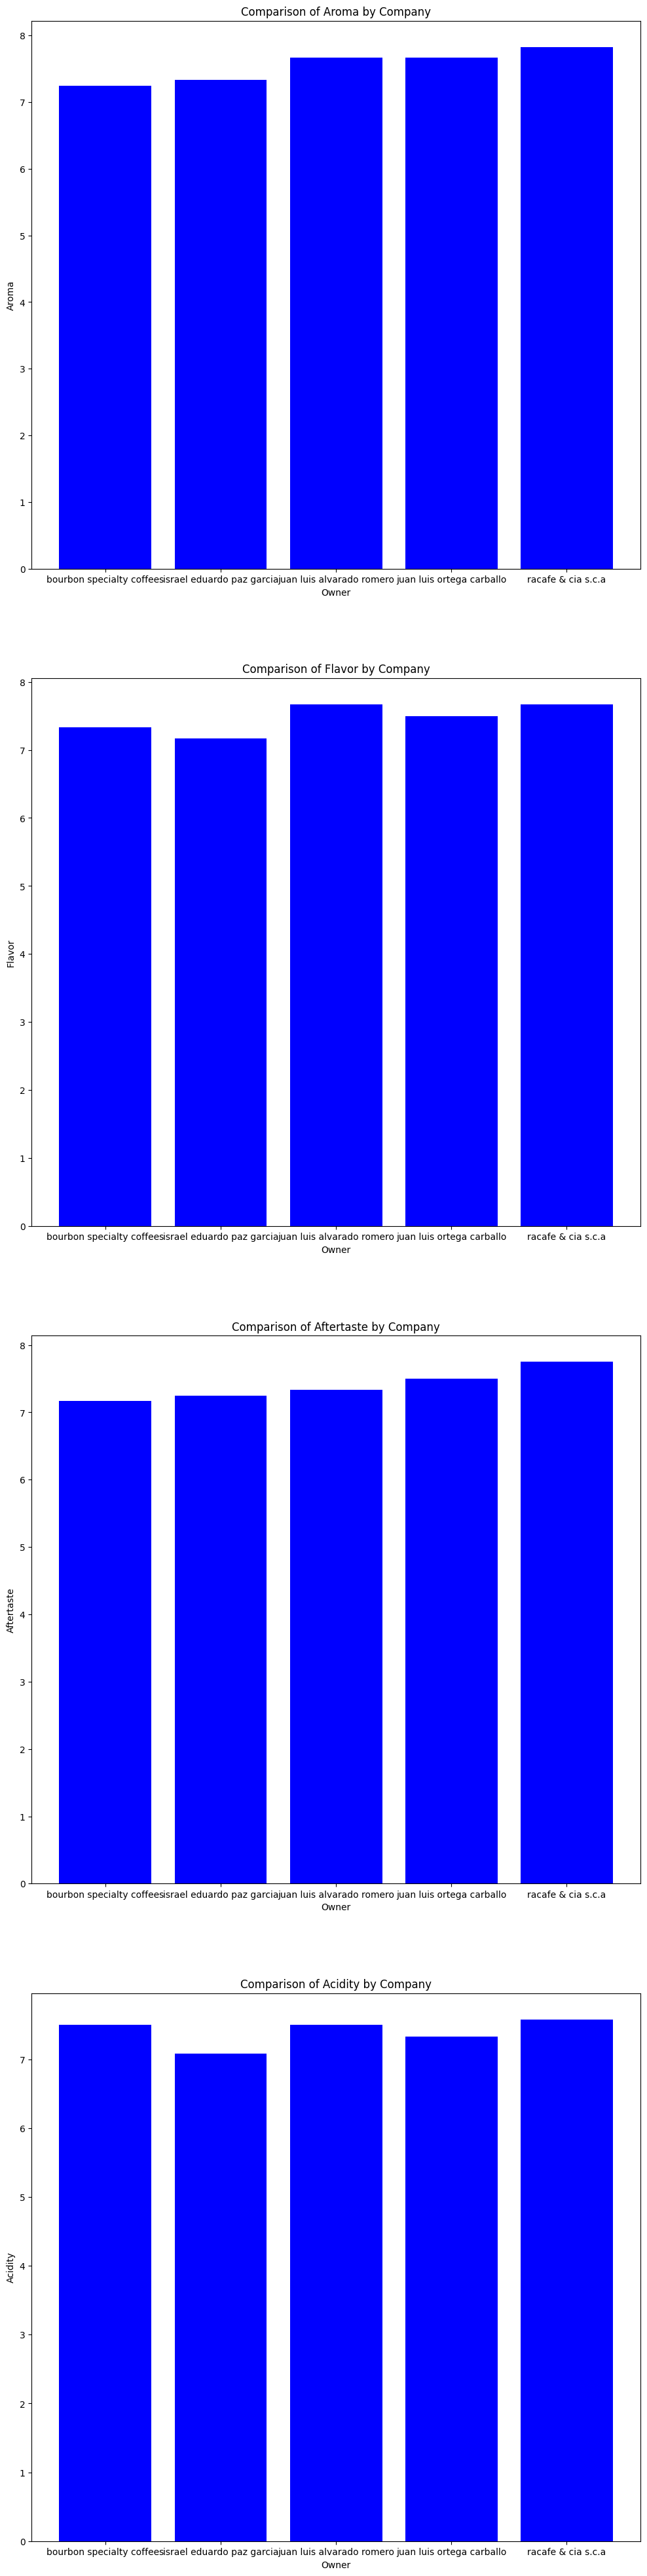

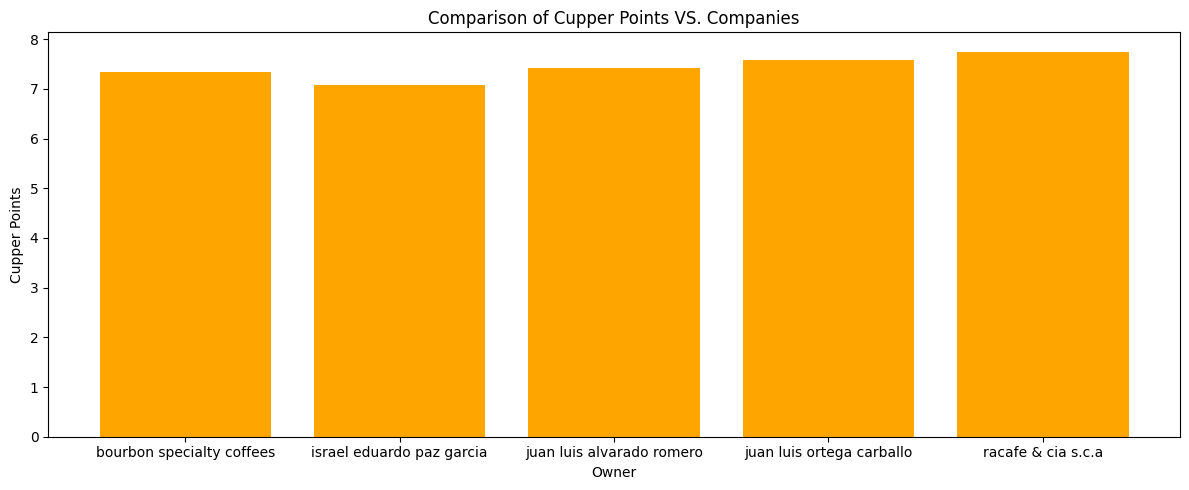

In [22]:
attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity']

sample_size = 5  

# random sample from the dataset
coffee_sample = Coffee.sample(n=sample_size, random_state=42)

# subplots for facets
fig, facets = plt.subplots(nrows=len(attributes), ncols=1, figsize=(12, 50))

# iterate through attributes besides cupper points, 
# have to make attributes an iterable 
# so we can perserve i's use as a number and be able to use in operator with attributes.
for i, attribute in enumerate(attributes):
    facet_number = facets[i]
    
    # Group by owner and calculate mean of their case attributes
    mean_scores = coffee_sample.groupby('Owner')[attribute].mean().reset_index()
    
    # Create a bar plot for the attribute
    facet_number.bar(mean_scores['Owner'], mean_scores[attribute], color='blue')
    facet_number.set_ylabel(attribute)
    facet_number.set_xlabel('Owner')
    facet_number.set_title(f'Comparison of {attribute} by Company')


plt.figure(figsize=(12, 5))
company_cupper_data = coffee_sample.groupby(['Owner'])['Cupper.Points'].mean().reset_index()
plt.bar(company_cupper_data['Owner'], company_cupper_data['Cupper.Points'], color='orange')
plt.xlabel('Owner')
plt.ylabel('Cupper Points')
plt.title('Comparison of Cupper Points VS. Companies')

#prevents overlapping
plt.tight_layout()
plt.show()

6. Does the color of the coffee affect the flavor?

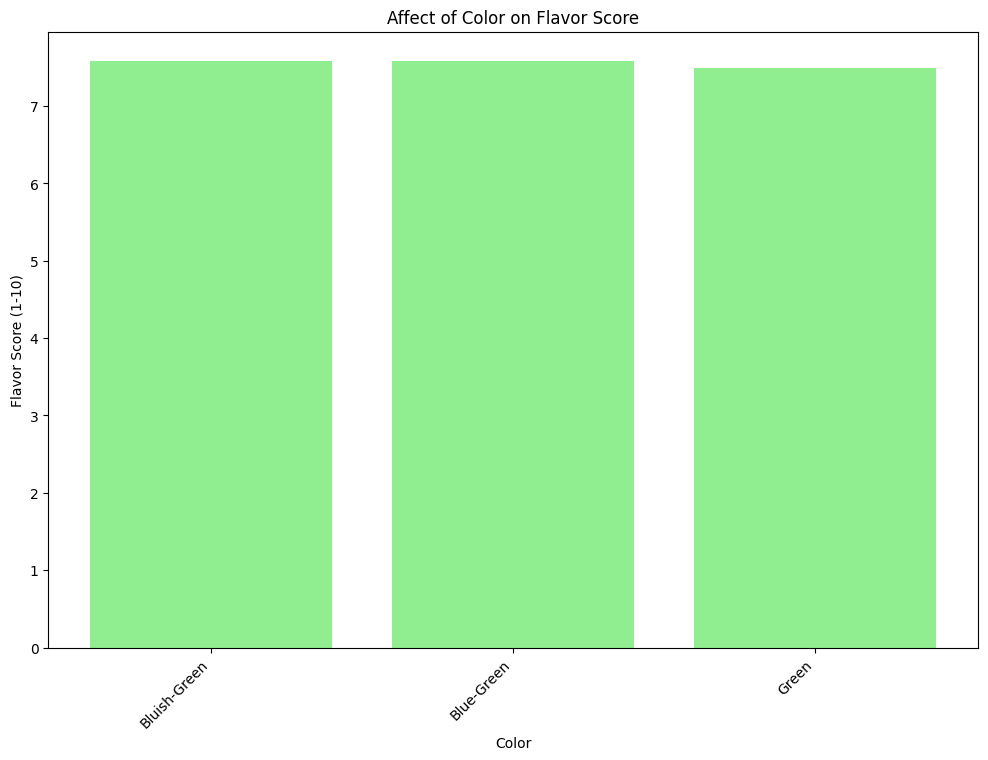

In [25]:
FlavorbyColor = Coffee[['Color','Flavor']]
df = pd.DataFrame(FlavorbyColor)

FlavorColorGrouped = df.groupby('Color')['Flavor'].mean().reset_index()
FlavorColorGrouped = FlavorColorGrouped.sort_values(by='Flavor', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(FlavorColorGrouped['Color'], FlavorColorGrouped['Flavor'], color='lightgreen')

#Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Color')
plt.ylabel('Flavor Score (1-10)')
plt.title('Affect of Color on Flavor Score')
plt.show()

This visualization plots the average flavor score of coffee's of each color variation, with a goal to see if there is any correlation between a color and its flavor. Typically, the first gauge we have when we get a plate of food or a cup of coffee, we notice it's color, and that may affect the way we eat it. For example, if you receive green beans and they are a grey color, you may predetermine that they don't taste as good as fresh green beans. Should the same principle hold true for coffee? According to this plot, the answer should be no. As you can see, each color of coffee tallied in the dataset has an average flavor of around 7.7, so there is very little correlation between coffee color and its flavor. I found this to be quite surprising considering I strongly associate coffee to be dark brown - almost black, yet 3 possible colors of coffee are in the Blue and Green range. However, knowing this insights, I should not be deterred from drinking it just based on its color, as the color as no affect on its flavor.

7. What do these visualizations tell us about the enjoyability of coffee.
    - Overall, the enjoyability score(Cupper points) and elements of the coffee were not determined by country or altitude. Summary statistics and visualization sugggested there was little link between these explanatory variables and enjoyability elements. For example, summary statistics suggested a high standard deviation in alitude and there was no correlation between altitude and enjoyability elements. The most compelling predictor was the company the coffee beans were produced by. Summary statistics and visualizations did suggest these mattered to us. For example, standard deviation was extremely low in cupper points for companies, suggessting that a slight difference in a visualization meant it was likely not a random event. In our bar graph, cupper points and other enjoyability elements did suggest a slight difference by company. 